In [88]:
import os
import pickle
import numpy as np
import itertools as it

from types import SimpleNamespace

import Modules.pauli as pauli
import Modules.Ham_MX2_11_band as H
import Modules.TB_parameters as TB
import Modules.plot_functions as pf

%matplotlib inline
# %matplotlib notebook
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

path = os.path.dirname(os.path.dirname(os.getcwd())) + '/data/11_band/'

In [89]:
out_name = 'winding_mus_sqrtExsDeltas_Delta15meV_large_range'
with open(path + out_name + '.p', 'rb') as fp:
    phase_diagram = pickle.load(fp)
    mus = pickle.load(fp)
    Exs = pickle.load(fp)
    kxs = pickle.load(fp)
    p = pickle.load(fp)
    fixed_ky = pickle.load(fp)
    phase = pickle.load(fp)
sqrts = np.sqrt(Exs**2 - p.Delta**2)

In [90]:
winding_data = np.reshape(phase_diagram, (len(sqrts), len(mus)))

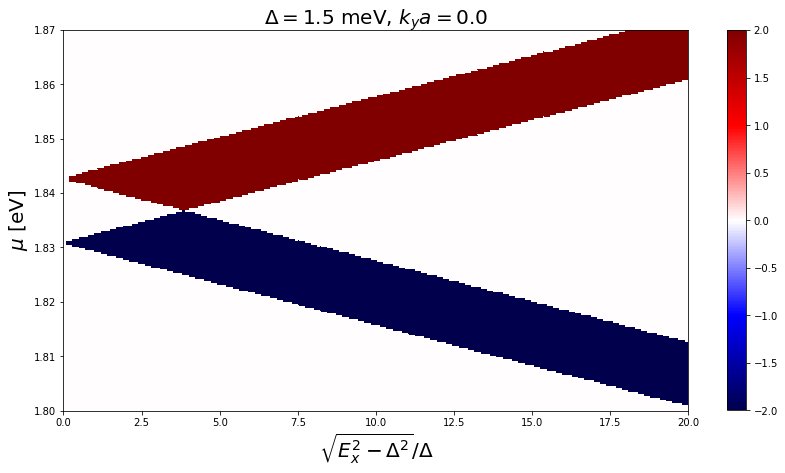

In [91]:
pf.plot_color_data(phase_diagram, sqrts/p.Delta, mus, figsize=(14, 7),
                   title=r'$\Delta = $'+str(1000*p.Delta)+' meV, $k_y a = $'+str(fixed_ky),
                   xlabel=r'$\sqrt{E_x^2-\Delta^2}/\Delta$', ylabel=r'$\mu$ [eV]',
                   pcolor=True, cmap='seismic', transpose=True)

In [92]:
out_name = 'topo_gap_meV_mus_Exs_Delta15meV_ky=0'
with open(path + out_name + '.p', 'rb') as fp:
    data = pickle.load(fp)
    mus = pickle.load(fp)
    Exs = pickle.load(fp)
    p = pickle.load(fp)
    fixed_ky = pickle.load(fp)
sqrts = np.sqrt(Exs**2 - p.Delta**2)

In [93]:
gap_data = np.reshape(data, (len(sqrts), len(mus)))

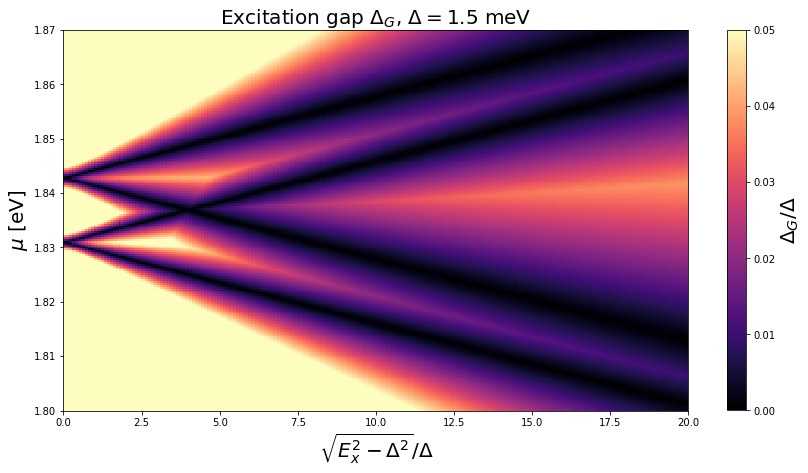

In [94]:
pf.plot_color_data(data, sqrts/p.Delta, mus, figsize=(14, 7), norm=p.Delta*1000, half_BZ=False, transpose=True,
                   title=r'Excitation gap $\Delta_G$, '+'$\Delta = $'+str(1000*p.Delta)+' meV',
                   xlabel=r'$\sqrt{E_x^2-\Delta^2}/\Delta$', ylabel=r'$\mu$ [eV]',
                   pcolor=True, cmap='magma', vmin=0, vmax=0.05, clabel=r'$\Delta_G/\Delta$')

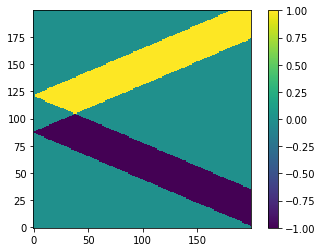

In [95]:
plt.imshow(winding_data, origin='lower')
plt.colorbar()

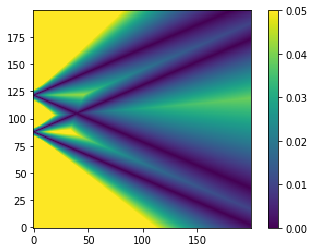

In [97]:
plt.imshow(gap_data/(p.Delta*1000), origin='lower', vmin=0, vmax=0.05)
plt.colorbar()

In [98]:
gdat = gap_data/(p.Delta*1000)

In [109]:
row = 88

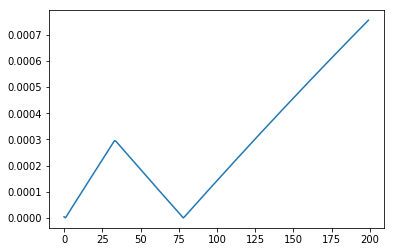

In [111]:
plt.plot([Ex*ele for Ex, ele in zip(Exs, gdat[row, :])])

In [70]:
mag_data = np.array([Ex*col/(p.Delta) for Ex, col in zip(Exs, gap_data.T)])

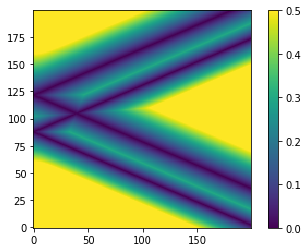

In [71]:
plt.imshow(mag_data.T, origin='lower', vmin=0, vmax=0.5)
plt.colorbar()

In [72]:
topo_gaps = [gap/(1000*p.Delta) if winding != 0 else 0 for gap, winding in
             zip(gap_data.flatten(), winding_data.flatten())]

In [73]:
mag_gaps = [gap if winding != 0 else 0 for gap, winding in
             zip(mag_data.T.flatten(), winding_data.flatten())]

In [74]:
tgaps = np.reshape(topo_gaps, (len(sqrts), len(mus)))

In [75]:
mgaps = np.reshape(mag_gaps, (len(sqrts), len(mus)))

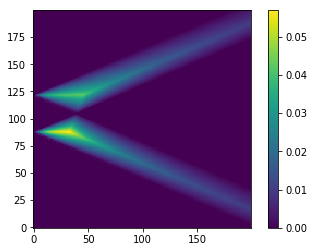

In [76]:
plt.imshow(tgaps, origin='lower')
plt.colorbar()

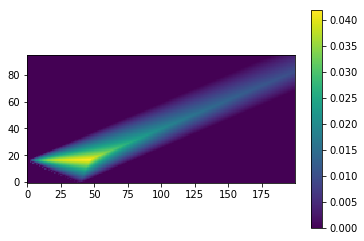

In [82]:
plt.imshow(tgaps[105:, :], origin='lower')
plt.colorbar()

In [86]:
max_upper_Ex_gap = [np.max(col) for col in tgaps[105:, :].T]    

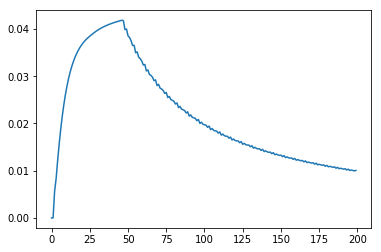

In [87]:
plt.plot(max_upper_Ex_gap)

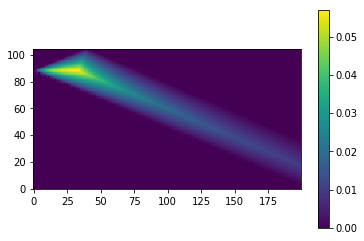

In [83]:
plt.imshow(tgaps[:105, :], origin='lower')
plt.colorbar()

In [ ]:
max_lower_Ex_gap = [np.max(col) for col in tgaps[:105, :].T]    

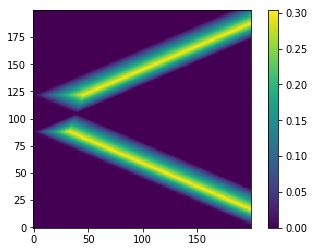

In [77]:
plt.imshow(mgaps, origin='lower')
plt.colorbar()

In [53]:
max_gap = [np.max(row) for row in tgaps]    

In [54]:
max_mgap = [np.max(row) for row in mgaps]    

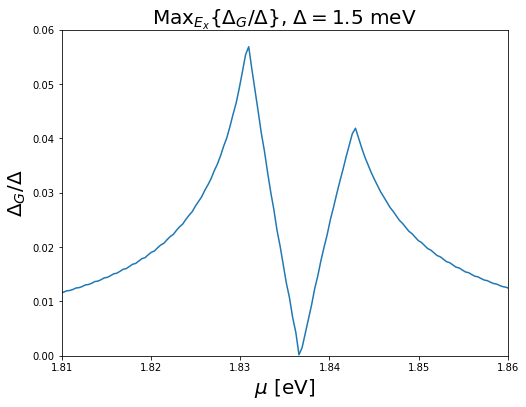

In [55]:
fig = plt.figure(figsize=(8, 6))
plt.plot(mus, max_gap)
plt.ylim(0, 0.06)
plt.xlim(1.81, 1.86)
plt.ylabel(r'$\Delta_G/\Delta$', size=20)
plt.xlabel(r'$\mu$ [eV]', size=20)
plt.title(r'$\mathrm{Max}_{E_x}\{\Delta_G/\Delta\}$, $\Delta = 1.5$ meV', size=20)

In [56]:
np.max(max_gap)

0.056861157299101996

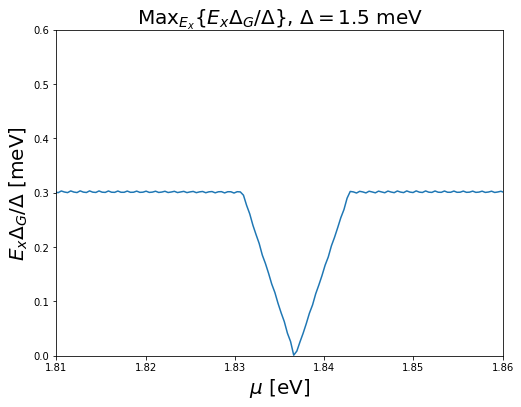

In [60]:
fig = plt.figure(figsize=(8, 6))
plt.plot(mus, max_mgap)
plt.ylim(0, 0.6)
plt.xlim(1.81, 1.86)
plt.ylabel(r'$E_x\Delta_G/\Delta$ [meV]', size=20)
plt.xlabel(r'$\mu$ [eV]', size=20)
plt.title(r'$\mathrm{Max}_{E_x}\{E_x\Delta_G/\Delta\}$, $\Delta = 1.5$ meV', size=20)